In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

def tendencia(dicio, start=2000, end=2024, norm=False):
    scaler = MinMaxScaler()
    plt.figure(figsize=(12, 6))

    ls = []  # Lista com número de publicações por ano para cada conjunto
    anos = list(range(start, end + 1))

    for search_name, path in dicio.items():
        if search_name == 'Categoria':
            continue
        df = pd.read_csv(path)
        l = []
        for i in anos:
            soma = df['Date Added To Xplore'].str.contains(f'{i}', na=False).sum()
            l.append(soma)
        ls.append(l)

    ls = np.array(ls).T  # Transpor para ter anos nas linhas
    if norm:
        ls = scaler.fit_transform(ls)

    # Pegando apenas as chaves válidas (sem 'Categoria')
    nomes_validos = [k for k in dicio.keys() if k != 'Categoria']

    for i, search_name in enumerate(nomes_validos):
        plt.plot(anos, ls[:, i], marker='o', label=search_name)
    plt.xticks(anos, rotation=45)
    plt.tight_layout()

    categoria = dicio.get('Categoria', 'Categoria não especificada')
    if norm:
        plt.title(f'Tendência Normalizada de Publicações ({categoria})')
        plt.ylabel('Publicações (normalizadas)')
    else:
        plt.title(f'Tendência de Publicações ({categoria})')
        plt.ylabel('Publicações')

    plt.xlabel('Ano')
    plt.legend()
    plt.show()

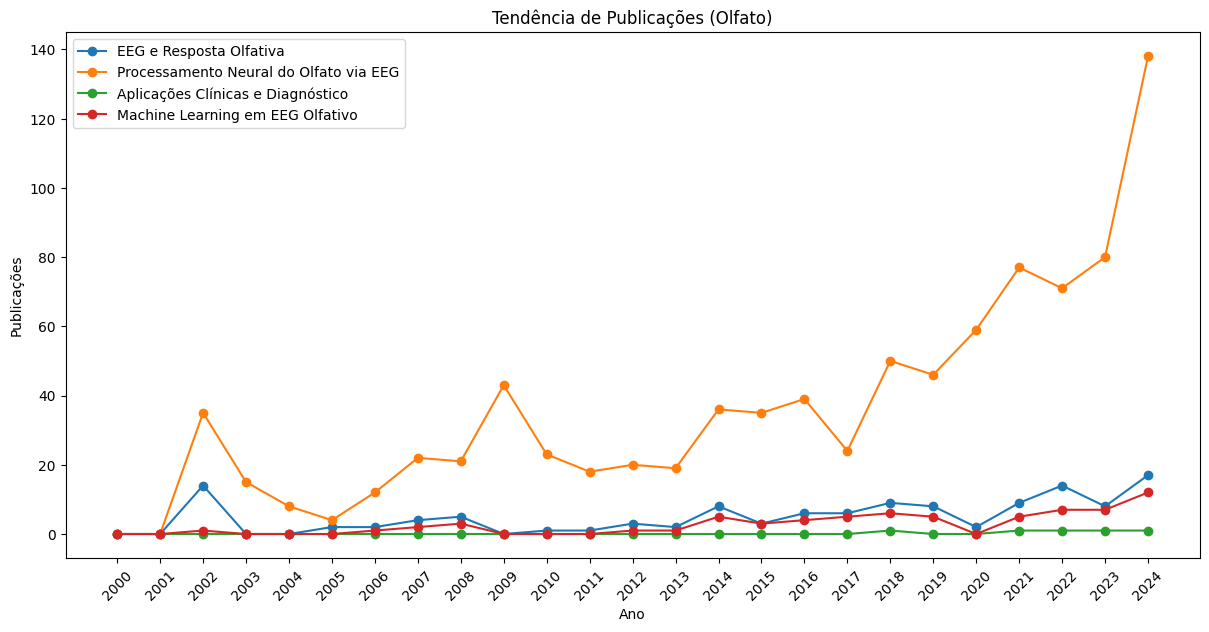

In [55]:
dicio_olfato = {
    'Categoria' : 'Olfato', 
    'EEG e Resposta Olfativa' : 'articles/Olfactory/exportsIEEE/export2025.05.19-11.18.24.csv',
    'Processamento Neural do Olfato via EEG' : 'articles/Olfactory/exportsIEEE/export2025.05.19-11.21.31.csv',
    'Aplicações Clínicas e Diagnóstico': 'articles/Olfactory/exportsIEEE/export2025.05.19-11.22.47.csv',
    'Machine Learning em EEG Olfativo' : 'articles/Olfactory/exportsIEEE/export2025.05.19-11.26.40.csv'
}


tendencia(dicio_olfato, end=2024)

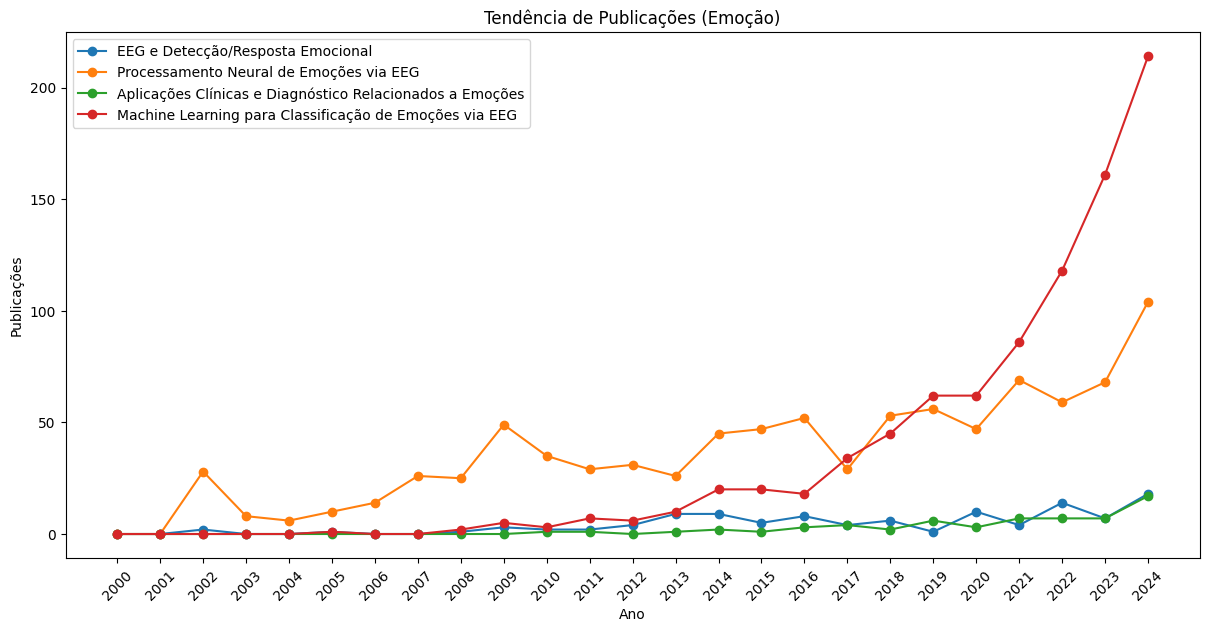

In [56]:
dicio_emocao = {
    'Categoria' : 'Emoção',
    'EEG e Detecção/Resposta Emocional': 'articles/Emotion/exportsIEEE/export2025.05.19-11.40.05.csv',
    'Processamento Neural de Emoções via EEG': 'articles/Emotion/exportsIEEE/export2025.05.19-11.43.00.csv',
    'Aplicações Clínicas e Diagnóstico Relacionados a Emoções': 'articles/Emotion/exportsIEEE/export2025.05.19-11.45.04.csv',
    'Machine Learning para Classificação de Emoções via EEG': 'articles/Emotion/exportsIEEE/export2025.05.19-11.46.49.csv',
}

tendencia(dicio=dicio_emocao, end=2024)